# Loan Approval 
## by Peter
## Introduction
This datasets consist of different features used by the loaner to determine who gets approved for the applied the loan and who doesnot.  collected nvestigation of creteria to be given a loan.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading original datasets
loan_df=pd.read_csv("prosperLoanData.csv")
loan_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
#making copy of the data 
loan_data=loan_df.copy()
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Converting True and False values and Floats into int
loan_data['IsBorrowerHomeowner']=loan_data['IsBorrowerHomeowner'].astype(int)
loan_data['StatedMonthlyIncome']=loan_data['StatedMonthlyIncome'].astype(int)


In [5]:
loan_data.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

## Univariate Exploration
In this section, I was exploring the data by using visualization. First, I wanted to explore the employment status of the borrowers. Turnout that people who are employed and somehow full time have more counts compare to others for example the retired and part timers.

Text(0.5, 1.0, 'Employment Status of Borrower vs Counts')

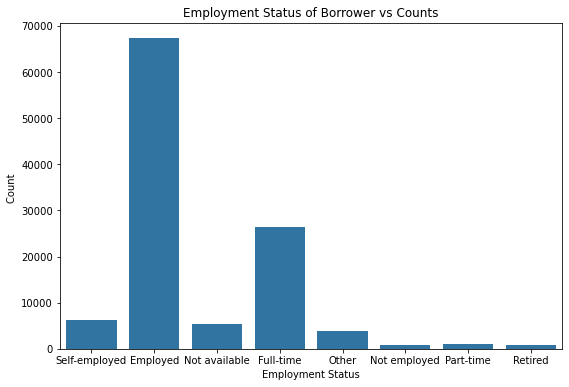

In [6]:
color_base=sb.color_palette()[0]
fig=plt.figure(figsize=(9,6))
sb.countplot(data=loan_data, x="EmploymentStatus",color=color_base)
plt.xlabel("Employment Status")
plt.ylabel("Count ")
plt.title("Employment Status of Borrower vs Counts")

### Occupation of borrower
The analysis found that borrower who mentioned others and those in somewhat midle position to exective have more chance of accessing to loan.

<AxesSubplot:xlabel='count', ylabel='Occupation'>

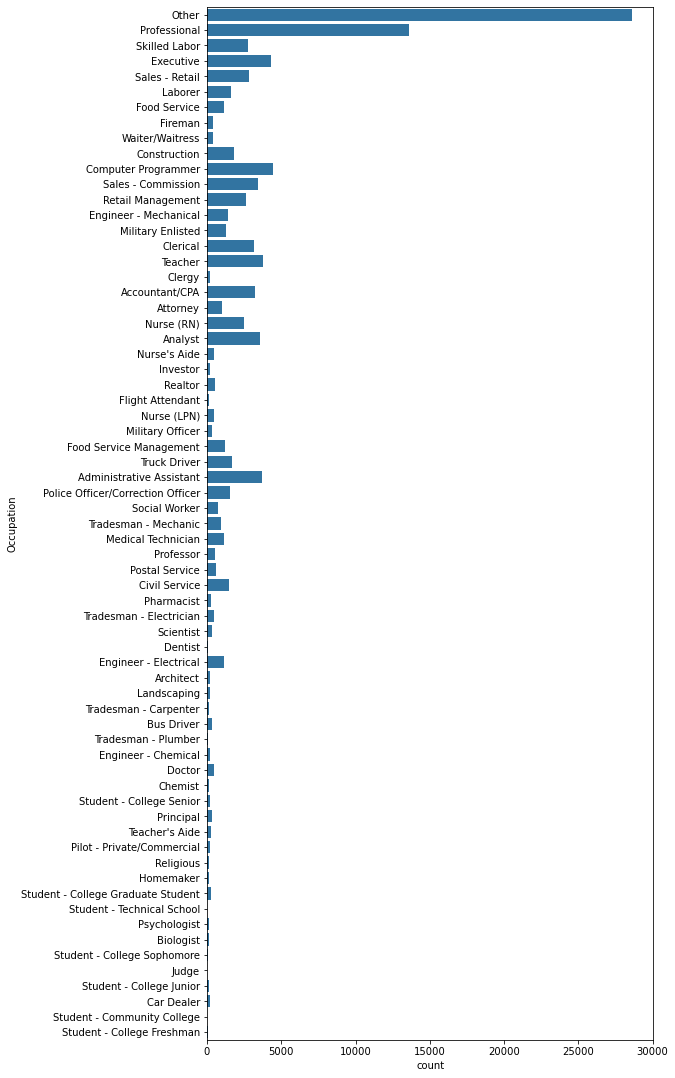

In [7]:
plt.figure(figsize=(8,19))
sb.countplot(data=loan_df,y="Occupation",color=color_base)

### IstheOwner Homeowner
Determing if the borrower is a home owner or not, and after analysis we found that there no much difference between home owner or not.

Text(0, 0.5, 'Frequency')

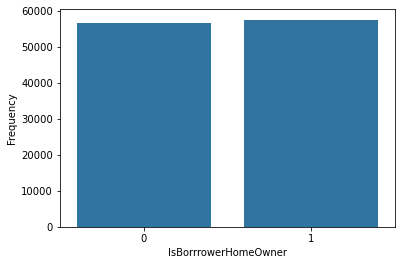

In [8]:
sb.countplot(data=loan_data,x='IsBorrowerHomeowner', color=color_base)
plt.xlabel("IsBorrrowerHomeOwner")
plt.ylabel("Frequency")#

### Terms of payment
It appears like majority of borrowers opted for 36 months of loan repayment  as shown on the below graph.


Text(0.5, 1.0, 'Loan Payment Term vs Count')

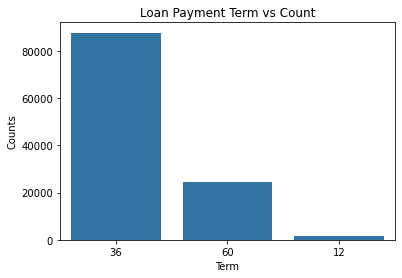

In [9]:
sb.countplot(data=loan_data,x="Term",color=color_base,order=[36,60,12])
plt.xlabel("Term")
plt.ylabel("Counts")
plt.title("Loan Payment Term vs Count")

### State of the Borrower
We were also interested on investigating which state get most appoved for the loan and we found that California, Texas and Florida were among the top states

Text(0.5, 1.0, 'Borrrower vs Counts')

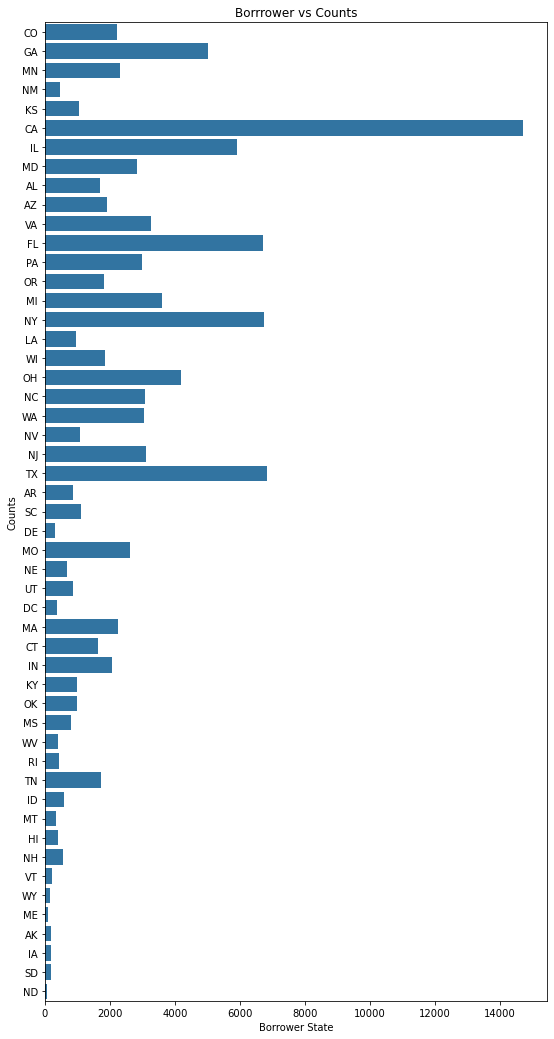

In [10]:
plt.figure(figsize=(9, 18))
sb.countplot(data=loan_data,y='BorrowerState', color=color_base)
plt.xlabel("Borrower State")
plt.ylabel("Counts")
plt.title("Borrrower vs Counts")

### Income range
To access to good fund, we found that the borrower have to earn more than 24K.

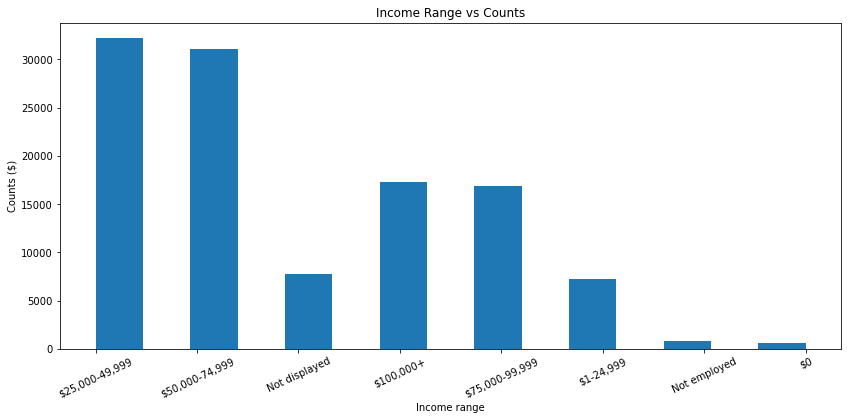

In [11]:
fig_size = plt.figure()
fig_size.set_figwidth(14)
fig_size.set_figheight(6)
plt.hist(data=loan_data,x="IncomeRange",bins=15)
plt.xlabel("Income range")
plt.ylabel("Counts ($)")
plt.title("Income Range vs Counts")
plt.xticks(rotation=25);

### Loan Status
<p>Looking to loan status of borrower </p>


#### Loan status
We found that majority of people are still loan holders followed by those who have completed their payments.

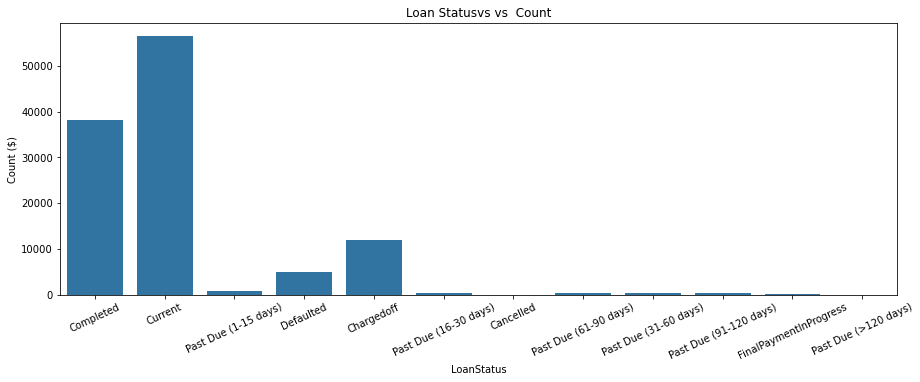

In [12]:
plt.figure(figsize=[15, 5]);
sb.countplot(data = loan_data, x = 'LoanStatus', color = color_base);
plt.title('Loan Statusvs vs  Count')
plt.ylabel('Count ($)');
plt.xlabel('LoanStatus');
plt.xticks(rotation=25);#

In [13]:
loan_data.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

### Loan Amount
We assume that due to exectives and only few who can access to large fund, we found that majority of borrowers go for amount betwween 1k to 5k

Text(0.5, 1.0, 'Loan Amount vs Count')

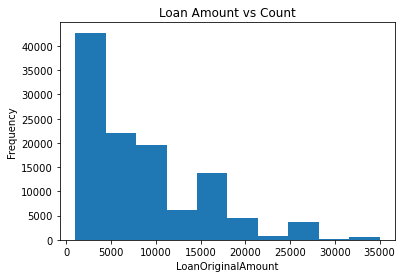

In [14]:
plt.hist(data=loan_data,x="LoanOriginalAmount")
plt.xlabel("LoanOriginalAmount")
plt.ylabel("Frequency")
plt.title("Loan Amount vs Count")

### Observation from Univariable analysis
<p>
I found that people from the state of California,Texas,Florida and New York had more chance of receiving the loan.</p>
<p>Also, the majority of borrowers opted to repay back the loan within 36 months. </p>
<p>
The decision to be given loan was not influenced by applicant having a house or  being homeowner.
</p>
<p>Overall, people with earning more than 24k had more chances of receiving the loan.</p>
<p>Also, individual who are employed  and have full time jobs have more access to large amount of loan compared to the not 
employed and part_timers and pensioners. </p>


## Bivariate Exploration
Investigating relationship between pairs of variables in the data.

### Finding relationship case #1
There was no  linear relationship between income and 

Text(0.5, 1.0, 'Relationship between IncomeRange vs LoanOriginal Amount')

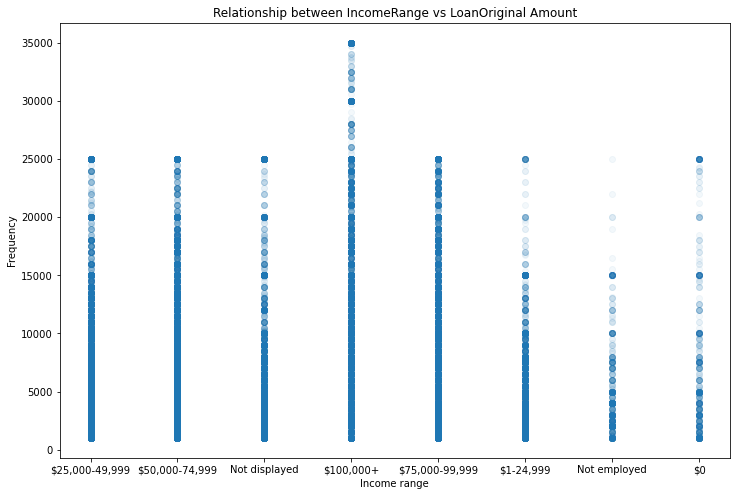

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(data=loan_data,x="IncomeRange",y="LoanOriginalAmount",alpha=1/20)
plt.xlabel("Income range")
plt.ylabel("Frequency")
plt.title("Relationship between IncomeRange vs LoanOriginal Amount")

### Finding relationship between variables
The graphs below shows that that employed people donot have lower rate however the unemployment does have higher rate. On the hand, small changes were observed as follow:
As the median rate became lower, the income range become higher.

## Conclusions
The analysis employed people who are working full timer are at advantage of receiving the loan, followed by self employed and retired and unemployed people are not likely to given the loan. Also,employees who are somewhat in executive position are more likely to access to large fund compared to general workers or students. At was also found that state has influence on whether to given a loan or not , for example borrower in the states of California and Texas are more likely to be given a loan.
Many times asset like house is very associated but this datasets reveal that being homeowner is not neccessary the factor to influence the decision whether to be given a loan or not.
